In [16]:
# Dalia Tavizon-Dykstra
# DSC 530 Week 12
# Final Project



---


# Table of Contents
* Section 1: Introduction and Dataset Overview
* Section 2: Data Preparation and Cleaning
* Section 3: Exploratory Data Analysis (EDA)
  * EDA Part 1: Trend Analysis
  * EDA Part 2: Seasonality Analysis
  * EDA Part 3: Correlation Analysis
* Section 4: Statistical Analysis
  * Defining the Null Hypothesis
  * Preparing Data for Analysis
  * Comparing mortgage rate and variable trends over time
  * Conducting the Hypothesis Test
  * Interpreting the Results
* Section 5: Regression Analysis
* Section 6: OLS Regression Results Summary
* Section 7: Detailed Variable Analysis
  * Variable Descriptions
  * Histograms & Descriptive Statistics
  * Probability Mass Function (PMF) Analysis
  * Cumulative Distribution Function (CDF) Analysis
  * Analytical Distribution Analysis
  * Scatter Plots and Correlation Analysis
* Section 8: Project Summary
  * Project Summary
  * EDA Outcome
  * Analysis Gaps
  * Additional Helpful Variables
  * Assumptions Review
  * Challenges and Understanding


---





---


**Section 1: Introduction and Dataset Overview**

# Final Project: Analysis of the Denver-Aurora-Lakewood, CO Real Estate Market

## Introduction
This project aims to analyze the real estate market in the Denver-Aurora-Lakewood, CO metro area, focusing on how changes in mortgage rates have affected market dynamics such as listing prices, active listing counts, and median days on market. The hypothesis is that increases in mortgage rates post-pandemic have led to significant changes in these market indicators.

## Dataset Overview
The dataset, sourced from [Realtor.com's data library](https://www.realtor.com/research/data/) and the [US Federal Reserve](https://fred.stlouisfed.org/series/MORTGAGE30US), includes monthly real estate metrics from July 2016 to January 2024. Key variables include median listing price, active listing count, median days on market, new listing count, 30-year mortgage rate, and more, providing a comprehensive view of the market trends over time.









---


**Section 2: Data Preparation and Cleaning**

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import norm


# Enabling Data Table Functionality in Google Colab for better DataFrame visualization:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Setting Pandas display options to avoid scientific notation in float numbers for better readability:
pd.options.display.float_format = '{:.2f}'.format

# Loading the dataset
file_path = 'https://raw.githubusercontent.com/dtavizondykstra/Housing-Market-Trends-Project/main/data/RDC_Inventory_Core_Metrics_Metro_History.csv'
data = pd.read_csv(file_path)

# Filtering for the Denver-Aurora-Lakewood, CO metro area
denver_data = data[data['cbsa_title'] == 'Denver-Aurora-Lakewood, CO']

# Preliminary data cleaning
# Convert month_date_yyyymm to a datetime format
denver_data['date'] = pd.to_datetime(denver_data['month_date_yyyymm'], format='%Y%m')

# Displaying the first few rows to verify
display(denver_data.head())


<ipython-input-17-8e9d701f37a2>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_data['date'] = pd.to_datetime(denver_data['month_date_yyyymm'], format='%Y%m')


,month_date_yyyymm,cbsa_code,cbsa_title,HouseholdRank,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,date
17,202401,19740,"Denver-Aurora-Lakewood, CO",18,599997,-0.02,0.00,4197,-0.15,0.11,...,-0.00,-0.02,7081,-0.09,0.11,0.69,0.11,-0.01,0.00,2024-01-01
943,202312,19740,"Denver-Aurora-Lakewood, CO",18,610000,-0.02,0.02,4947,-0.20,0.07,...,-0.03,0.02,7805,-0.17,0.04,0.58,0.06,-0.04,0.00,2023-12-01
1869,202311,19740,"Denver-Aurora-Lakewood, CO",18,625000,-0.02,0.03,6205,-0.06,0.03,...,-0.02,0.05,9443,-0.06,0.01,0.52,-0.01,-0.04,0.00,2023-11-01
2795,202310,19740,"Denver-Aurora-Lakewood, CO",18,635000,-0.02,0.02,6569,0.04,-0.00,...,-0.01,0.07,10058,-0.00,-0.03,0.53,-0.07,-0.05,0.00,2023-10-01
3721,202309,19740,"Denver-Aurora-Lakewood, CO",18,649000,-0.02,0.04,6346,0.08,-0.02,...,-0.01,0.09,10107,0.01,-0.08,0.61,-0.10,-0.09,0.00,2023-09-01




---


**Section 3: Exploratory Data Analysis (EDA)**

# Exploratory Data Analysis (EDA)

In this section, an exploratory data analysis will be conducted to understand the Denver-Aurora-Lakewood, CO real estate market trends. The focus will be on key metrics such as median_listing_price, active_listing_count, median_days_on_market, new_listing_count, and total_listing_count. The analysis aims to identify patterns and insights within these metrics.

**EDA Part 1: Trend Analysis**



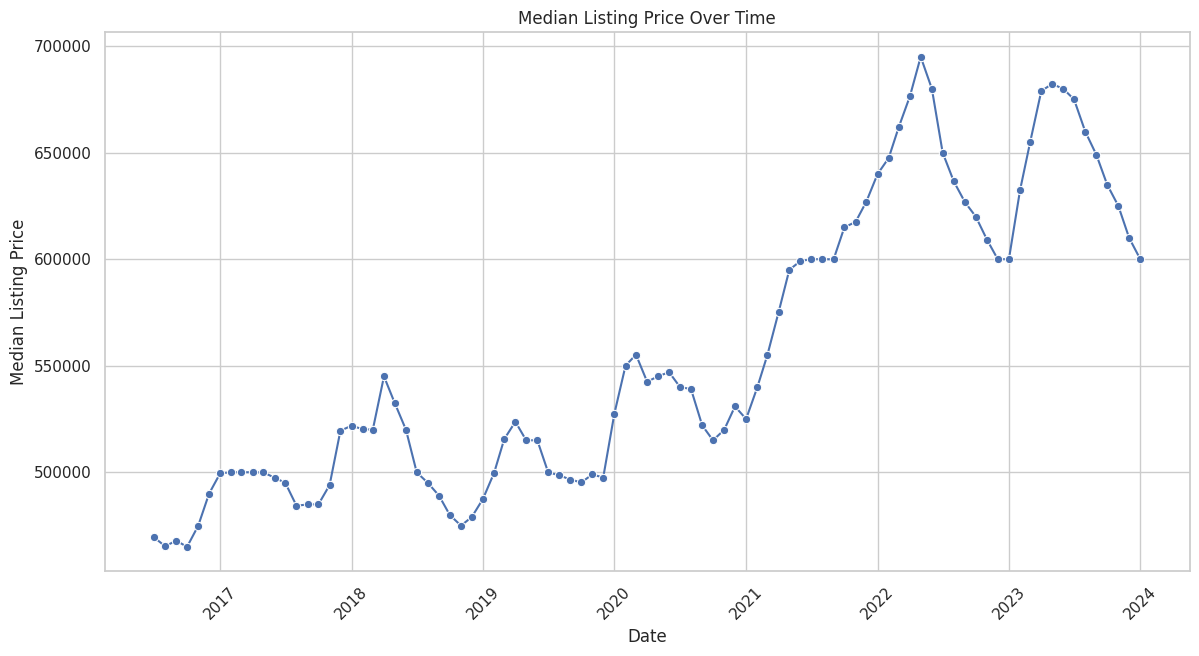

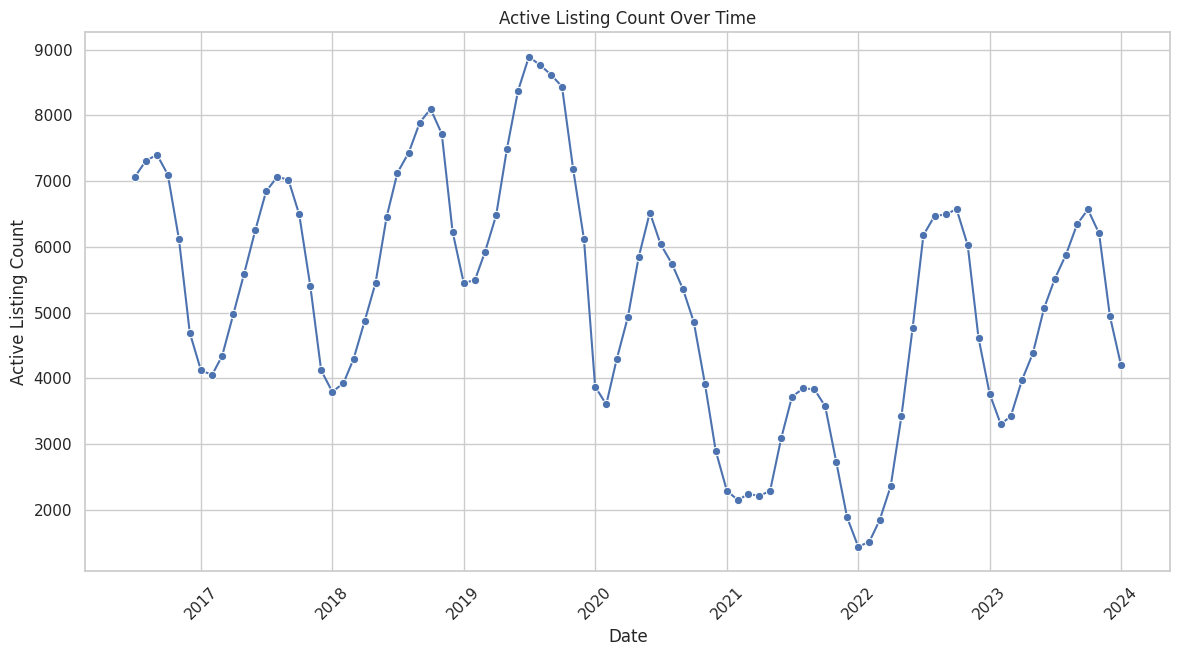

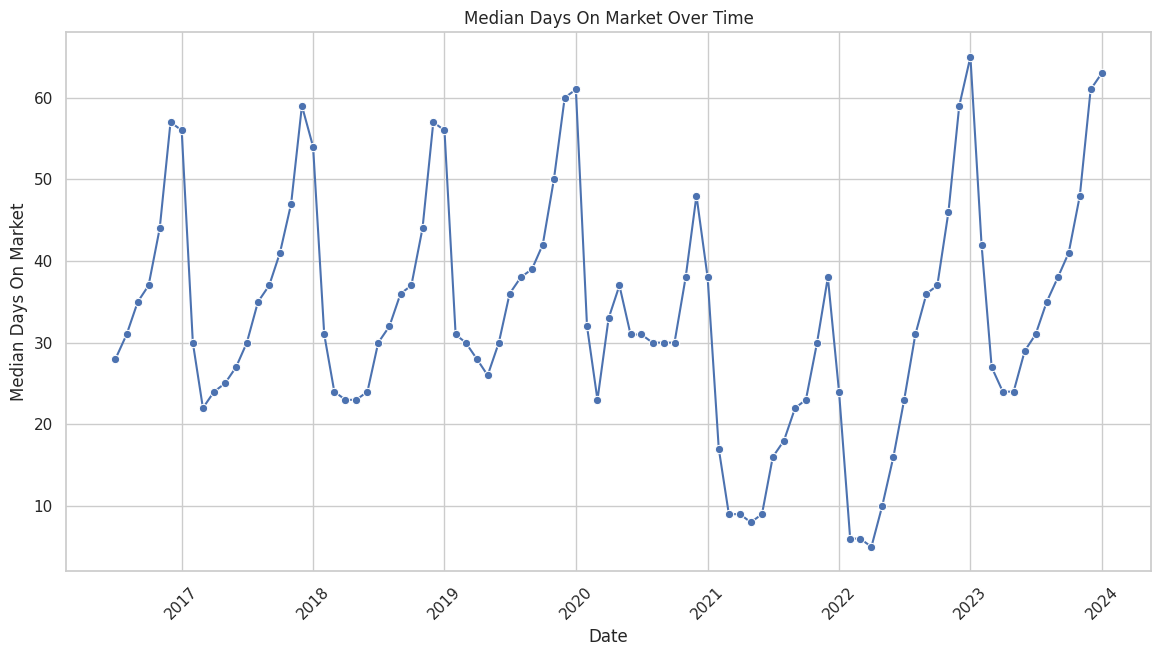

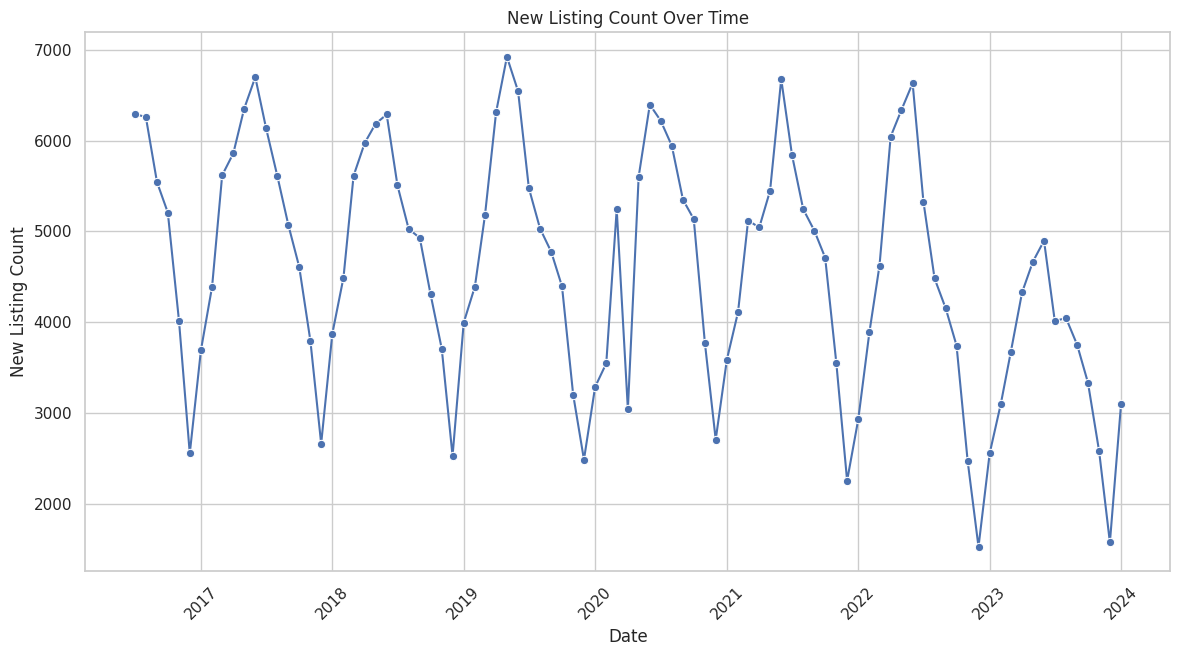

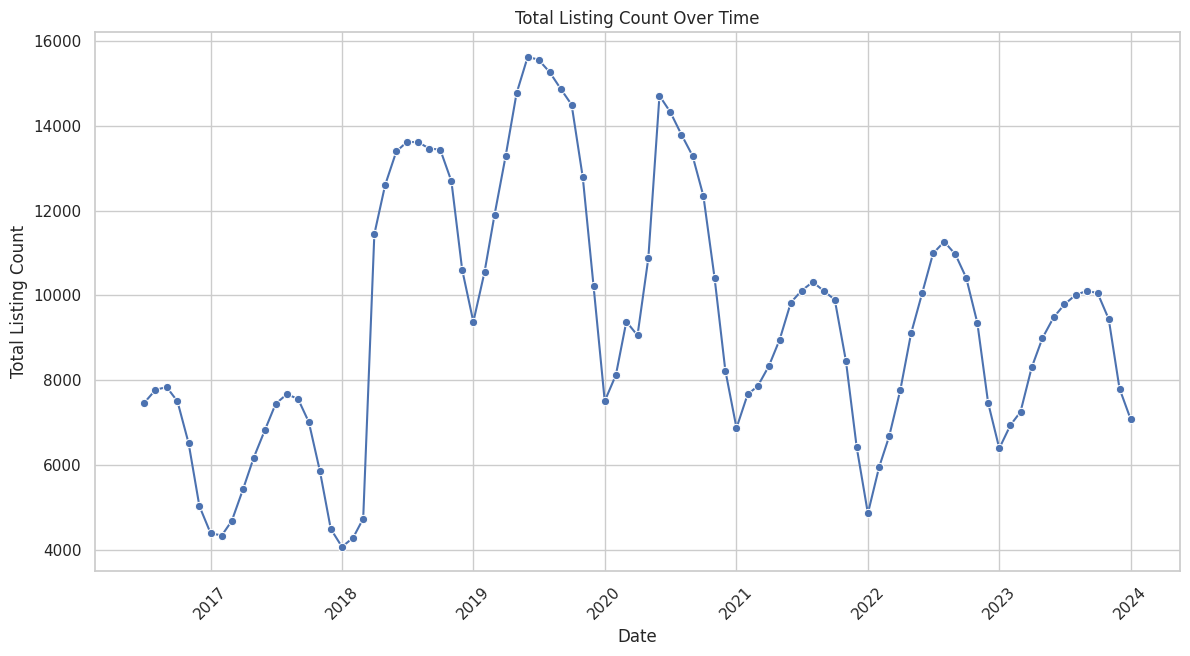

In [18]:
# Resetting index for plotting
denver_data.reset_index(inplace=True)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# List of variables to plot
variables = ['median_listing_price', 'active_listing_count', 'median_days_on_market',
             'new_listing_count', 'total_listing_count']

# Plotting each variable over time
for var in variables:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='date', y=var, data=denver_data, marker='o')
    plt.title(f'{var.replace("_", " ").title()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(var.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.show()


**EDA Part 2: Seasonality Analysis**

Seasonality can significantly influence real estate market trends, with certain times of the year typically showing more activity than others. This section is dedicated to uncovering seasonal patterns in various market indicators such as median listing price, active listing count, median days on market, new listing count, and average mortgage rate.

By extracting the year and month from the dataset's date entries, these variables can be broken down and compared on a monthly basis across different years. This temporal breakdown will allow for the observation and analysis of seasonal trends, such as peaks in buying or selling activity, which are essential for understanding the cyclical nature of the real estate market in the Denver-Aurora-Lakewood, CO metro area.

Visualizing these trends will help identify the times of the year when the market is most active or slow. These insights can provide valuable guidance for buyers, sellers, and investors to strategize accordingly. This analysis will also contribute to a deeper understanding of how external factors and market sentiments are reflected in the real estate cycle.


<ipython-input-19-20eab5267dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_data['year'] = denver_data['date'].dt.year
<ipython-input-19-20eab5267dcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_data['month'] = denver_data['date'].dt.month


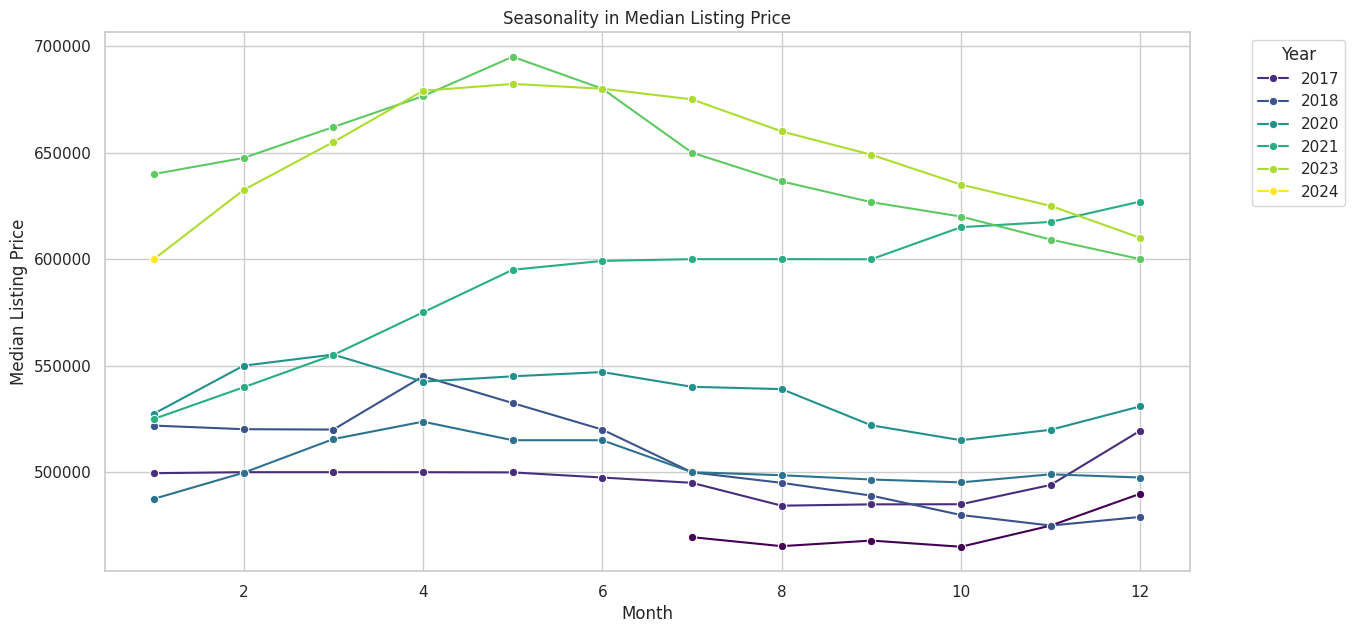

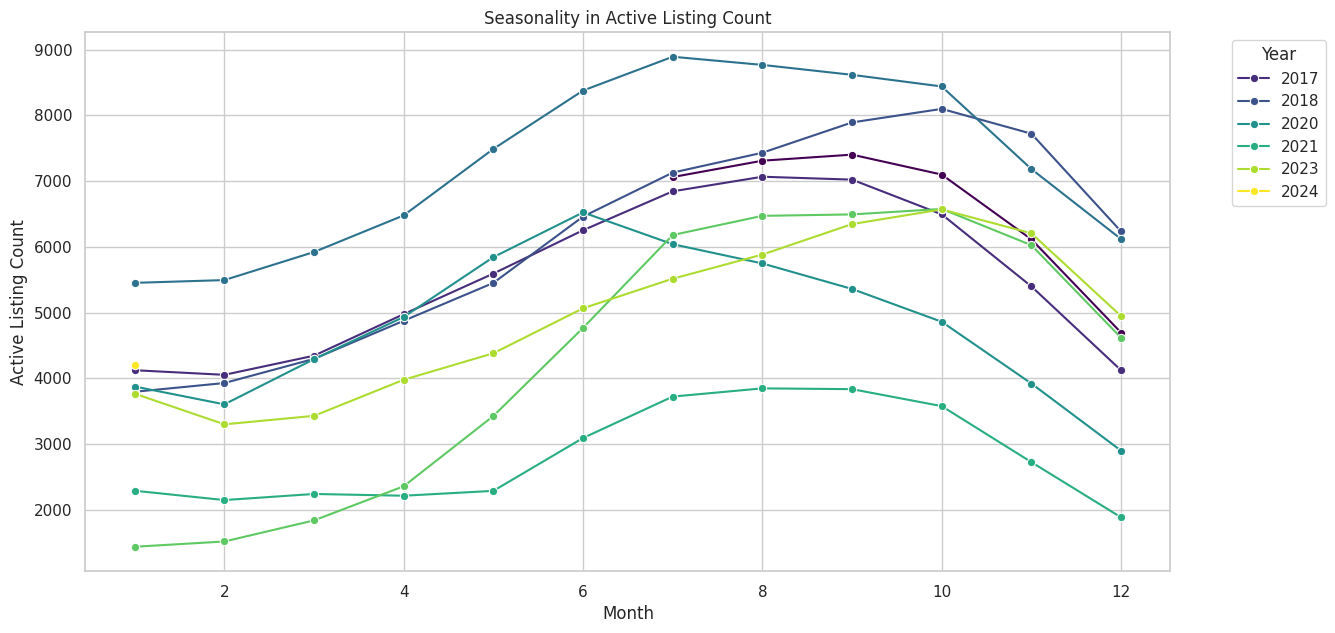

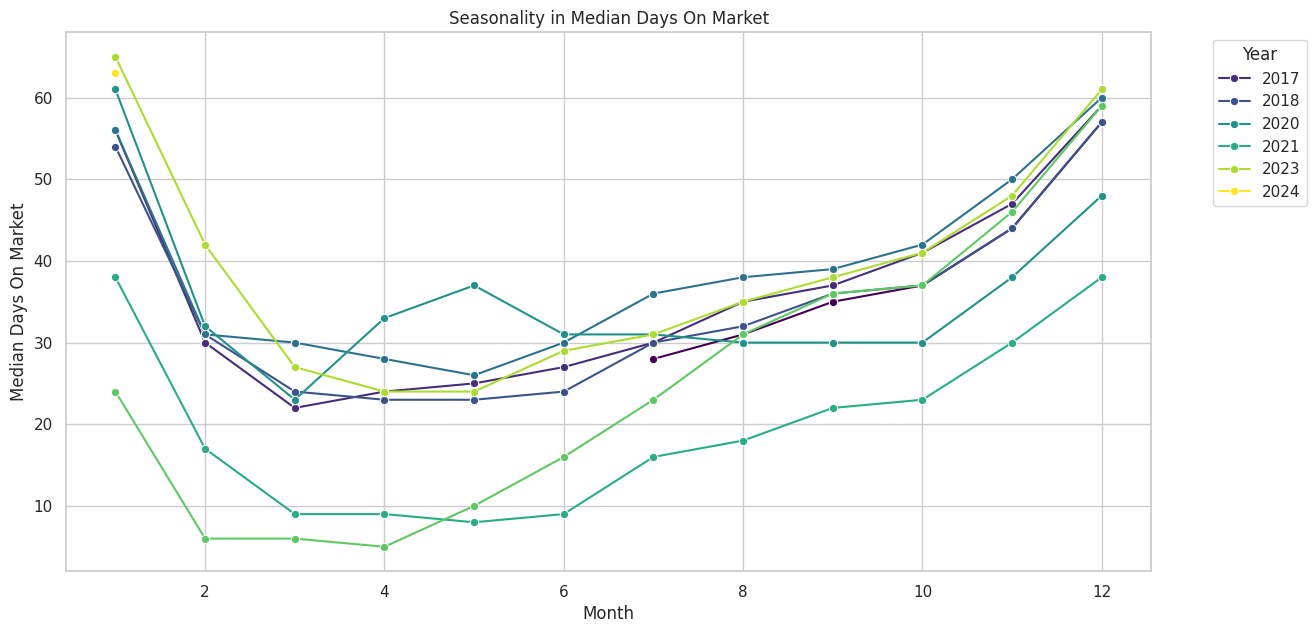

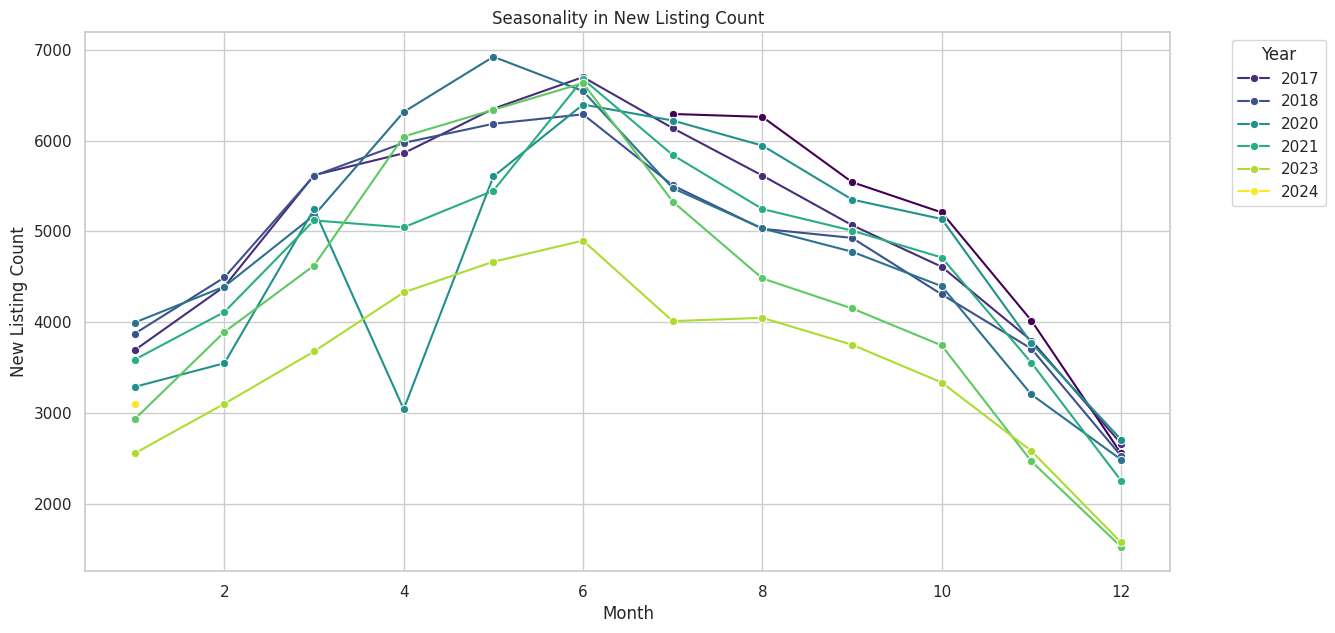

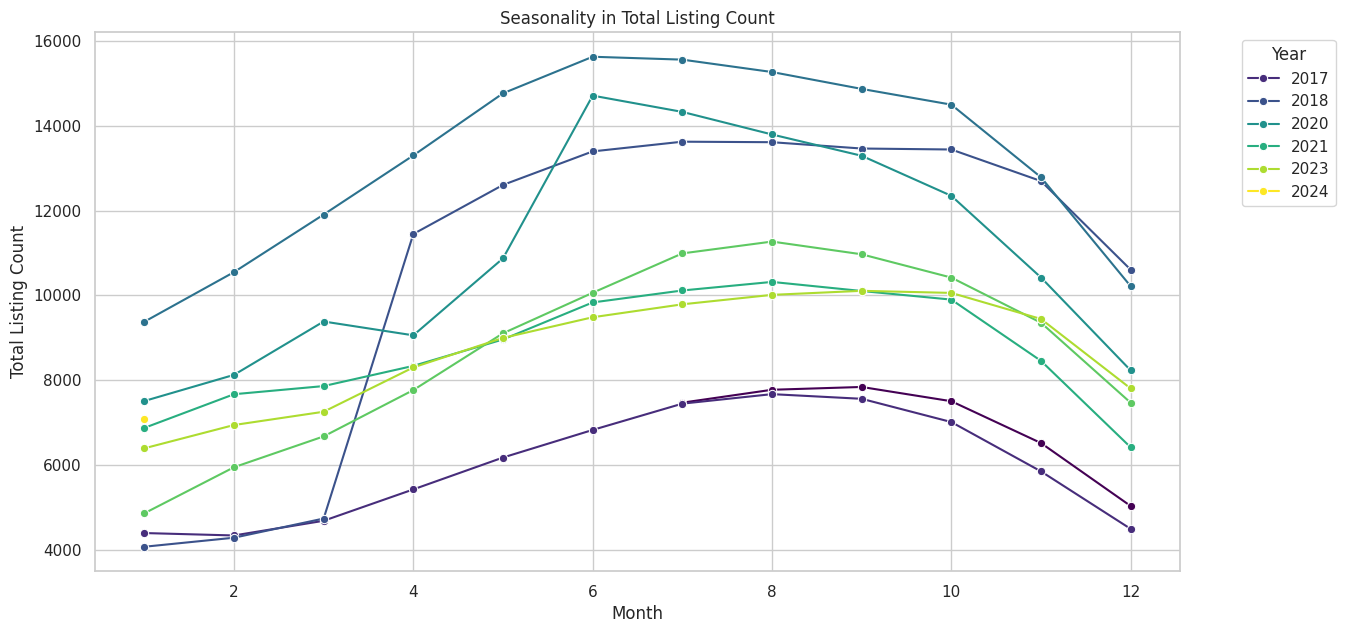

In [19]:
# Extracting year and month from the date for seasonality analysis
denver_data['year'] = denver_data['date'].dt.year
denver_data['month'] = denver_data['date'].dt.month

# Plotting seasonality trends for all variables
for var in variables:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='month', y=var, hue='year', data=denver_data, marker='o', palette='viridis')
    plt.title(f'Seasonality in {var.replace("_", " ").title()}')
    plt.xlabel('Month')
    plt.ylabel(var.replace("_", " ").title())
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


### Seasonality Interpretations

**Seasonality in Median Listing Price**
* The chart shows a noticeable trend where median listing prices peak during the mid-year months, potentially indicating a higher demand during the summer, which is a common buying season. This trend is consistent across multiple years, suggesting a strong seasonal effect in the listing prices. Prices tend to rise as the weather warms up and families prefer to move during the summer break from school, which could account for the higher prices observed in those months.

**Seasonality in Active Listing Count**
* The active listing count increases in the early months of the year and peaks around the summer before declining towards the end of the year. This pattern could be attributed to sellers choosing to list their properties during the high-demand summer months in anticipation of more buyer activity and potentially higher offers. The consistent seasonal pattern across years underlines the cyclic nature of the real estate market, with a build-up of inventory leading into the summer and a slowdown as the year ends.

**Seasonality in Median Days on Market**
* The median days on market for listings are shortest during the summer months, suggesting that properties sell faster during this period. This aligns with the peak buying season when more buyers are active, leading to quicker sales. Conversely, listings take longer to sell at the beginning and the end of the year, which could be due to the holiday season and colder weather, times when buyer activity typically slows down.

**Seasonality in New Listing Count**
* The new listing count also shows a clear seasonal pattern, with the highest number of new listings appearing in the spring and peaking in summer. Sellers might be timing the market to capitalize on the increased buyer activity during these months. The trend across different years is consistent, reaffirming the seasonal behavior observed in the real estate market.

**Seasonality in Total Listing Count**
* The total listing count, which includes both active and new listings, exhibits a strong seasonal pattern with inventory building up towards the summer months and tapering off towards the year's end. The peak during the summer months is likely due to both an increase in new listings and active listings remaining on the market from the spring. The decline in the later months of the year could be a result of listings being sold or taken off the market during the slower winter season.

**EDA Part 3: Correlation Analysis**


A comprehensive understanding of the real estate market requires examining the relationships between various market indicators. In this section, a correlation analysis will be conducted to quantitatively assess the strength and direction of relationships between several key variables: median listing price, active listing count, median days on market, new listing count, price reduced count, and pending listing count.

A correlation matrix will be used to visualize these relationships, providing a succinct overview of how these variables interrelate. For instance, the analysis may reveal that higher listing prices correlate with longer days on the market, or that an increase in new listings correlates with an increase in pending sales.

This heatmap will help identify pairs of variables that warrant further investigation. A strong positive or negative correlation could suggest a significant interdependency that could be explored in predictive modeling or used to inform strategic decisions in the market. Through this analysis, the goal is to identify potential drivers of market dynamics and insights that could influence investment and policy-making in the Denver-Aurora-Lakewood, CO metro area.


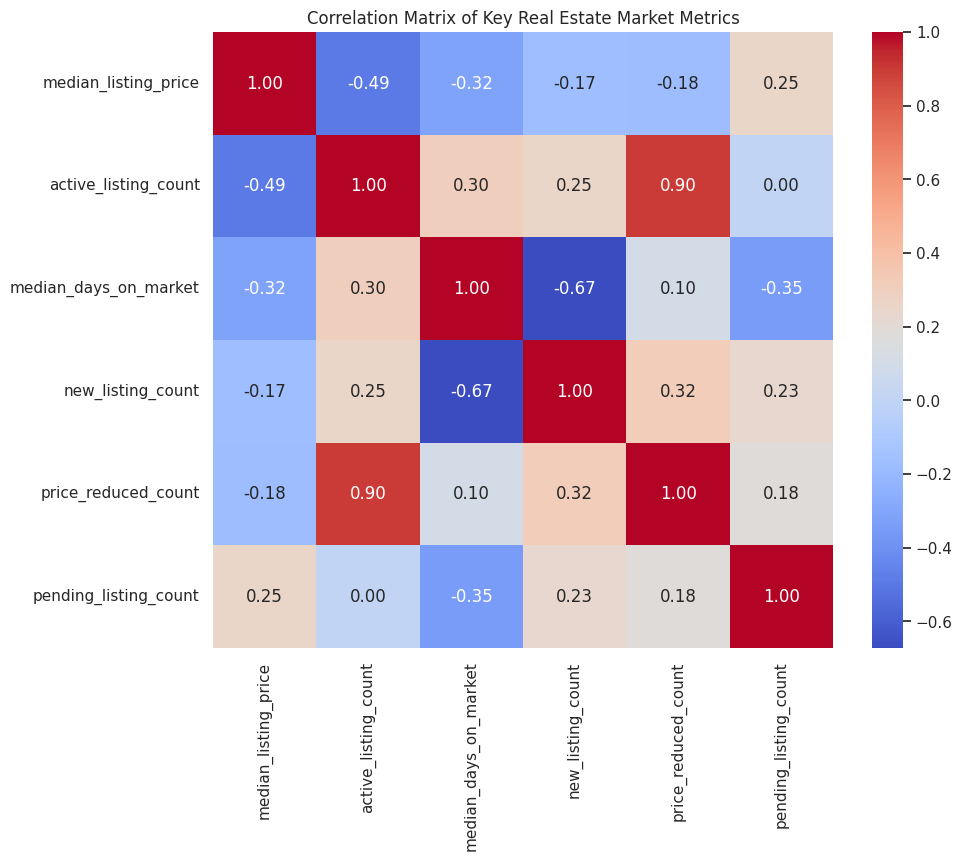

In [20]:
# Selecting key variables for correlation analysis
key_variables = ['median_listing_price', 'active_listing_count', 'median_days_on_market',
                 'new_listing_count', 'price_reduced_count', 'pending_listing_count']

# Correlation matrix
corr_matrix = denver_data[key_variables].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Real Estate Market Metrics')
plt.show()




---


**Section 4: Statistical Analysis**

# Statistical Analysis
To understand the impact of mortgage rates on the Denver-Aurora-Lakewood, CO real estate market, a hypothesis test will be conducted. The aim is to determine if there is a statistically significant relationship between [mortgage rates](https://fred.stlouisfed.org/series/MORTGAGE30US) and key real estate metrics such as median listing price and active listing count.

# Defining the Null Hypothesis
* **Null Hypothesis for Median Listing Price (H0_1)**: There is no significant linear relationship between mortgage rates and the median listing price in the Denver real estate market.
* **Null Hypothesis for Active Listing Count (H0_2):** There is no significant linear relationship between mortgage rates and the active listing count in the Denver real estate market.

**Preparing Data for Analysis**

In [21]:
# Importing and Merging Mortgage Rate Data
mortgage_data = pd.read_csv('https://raw.githubusercontent.com/dtavizondykstra/Housing-Market-Trends-Project/main/data/MORTGAGE30US.csv')

# Converting the 'DATE' column to datetime
mortgage_data['DATE'] = pd.to_datetime(mortgage_data['DATE'])


# Resampling the data to the end of each month and using the mean rate for the month
# (Since the Denver real estate data is monthly,the mortgage rate data will need to be converted to monthly as well)
mortgage_data.set_index('DATE', inplace=True)
monthly_mortgage_data = mortgage_data.resample('M').mean().reset_index()

# Merging the monthly mortgage data with the Denver real estate data
denver_data['date'] = denver_data['date'] + pd.offsets.MonthEnd(0)

# Merging the datasets on the date columns
merged_data = pd.merge(left=denver_data, right=monthly_mortgage_data, left_on='date', right_on='DATE', how='left')

# Checking the first few rows to confirm the merge worked as expected
merged_data.head()


<ipython-input-21-8d764e83e8cc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_data['date'] = denver_data['date'] + pd.offsets.MonthEnd(0)


,index,month_date_yyyymm,cbsa_code,cbsa_title,HouseholdRank,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,...,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,date,year,month,DATE,MORTGAGE30US
0,17,202401,19740,"Denver-Aurora-Lakewood, CO",18,599997,-0.02,0.00,4197,-0.15,...,0.11,0.69,0.11,-0.01,0.00,2024-01-31,2024,1,2024-01-31,6.64
1,943,202312,19740,"Denver-Aurora-Lakewood, CO",18,610000,-0.02,0.02,4947,-0.20,...,0.04,0.58,0.06,-0.04,0.00,2023-12-31,2023,12,2023-12-31,6.82
2,1869,202311,19740,"Denver-Aurora-Lakewood, CO",18,625000,-0.02,0.03,6205,-0.06,...,0.01,0.52,-0.01,-0.04,0.00,2023-11-30,2023,11,2023-11-30,7.44
3,2795,202310,19740,"Denver-Aurora-Lakewood, CO",18,635000,-0.02,0.02,6569,0.04,...,-0.03,0.53,-0.07,-0.05,0.00,2023-10-31,2023,10,2023-10-31,7.62
4,3721,202309,19740,"Denver-Aurora-Lakewood, CO",18,649000,-0.02,0.04,6346,0.08,...,-0.08,0.61,-0.10,-0.09,0.00,2023-09-30,2023,9,2023-09-30,7.20


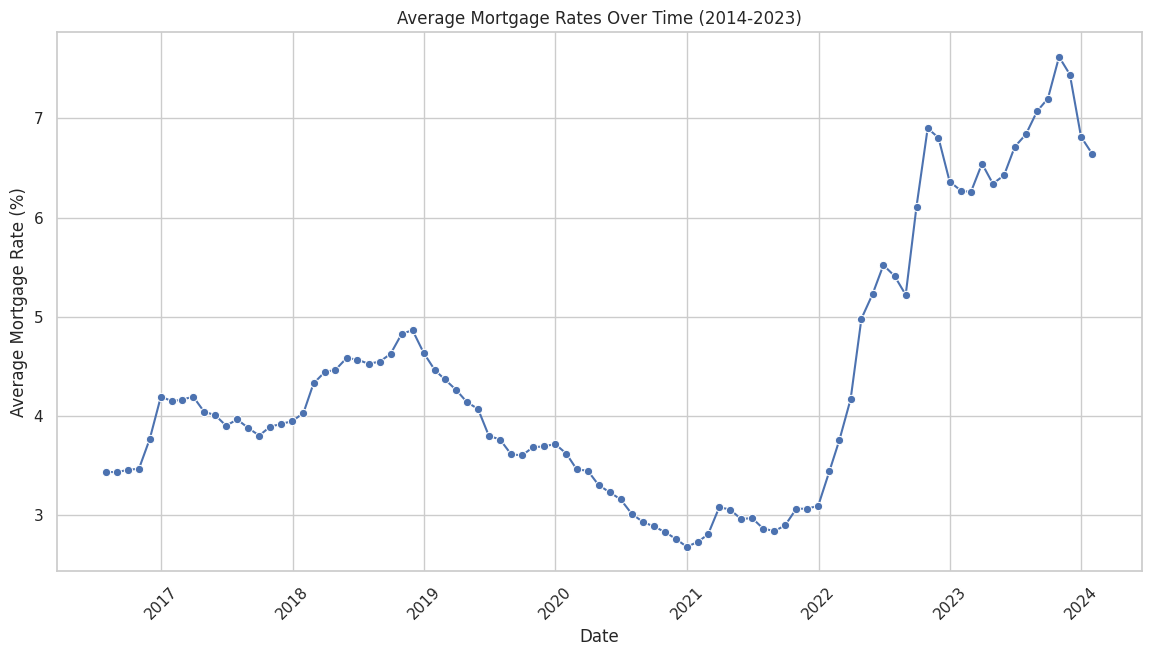

In [22]:
# Renaming the mortgage rate column and ensuring it's a float-type
merged_data.rename(columns={'MORTGAGE30US': 'average_mortgage_rate'}, inplace=True)
merged_data['average_mortgage_rate'] = merged_data['average_mortgage_rate'].astype(float)

# Removing any rows that didn't have a corresponding mortgage rate
merged_data.dropna(subset=['average_mortgage_rate'], inplace=True)

# Visualizing the mortgage rates over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='average_mortgage_rate', data=merged_data, marker='o')
plt.title('Average Mortgage Rates Over Time (2014-2023)')
plt.xlabel('Date')
plt.ylabel('Average Mortgage Rate (%)')
plt.xticks(rotation=45)
plt.show()


**Comparing mortgage rate and variable trends over time**

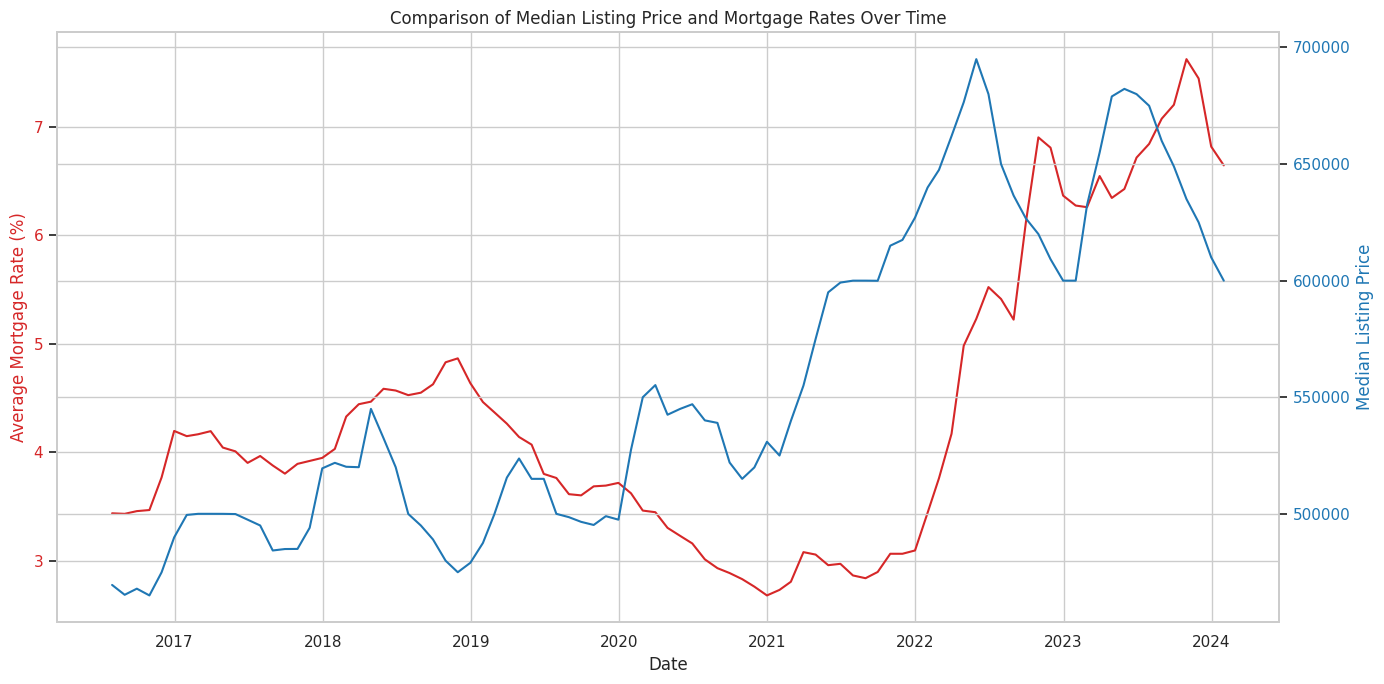

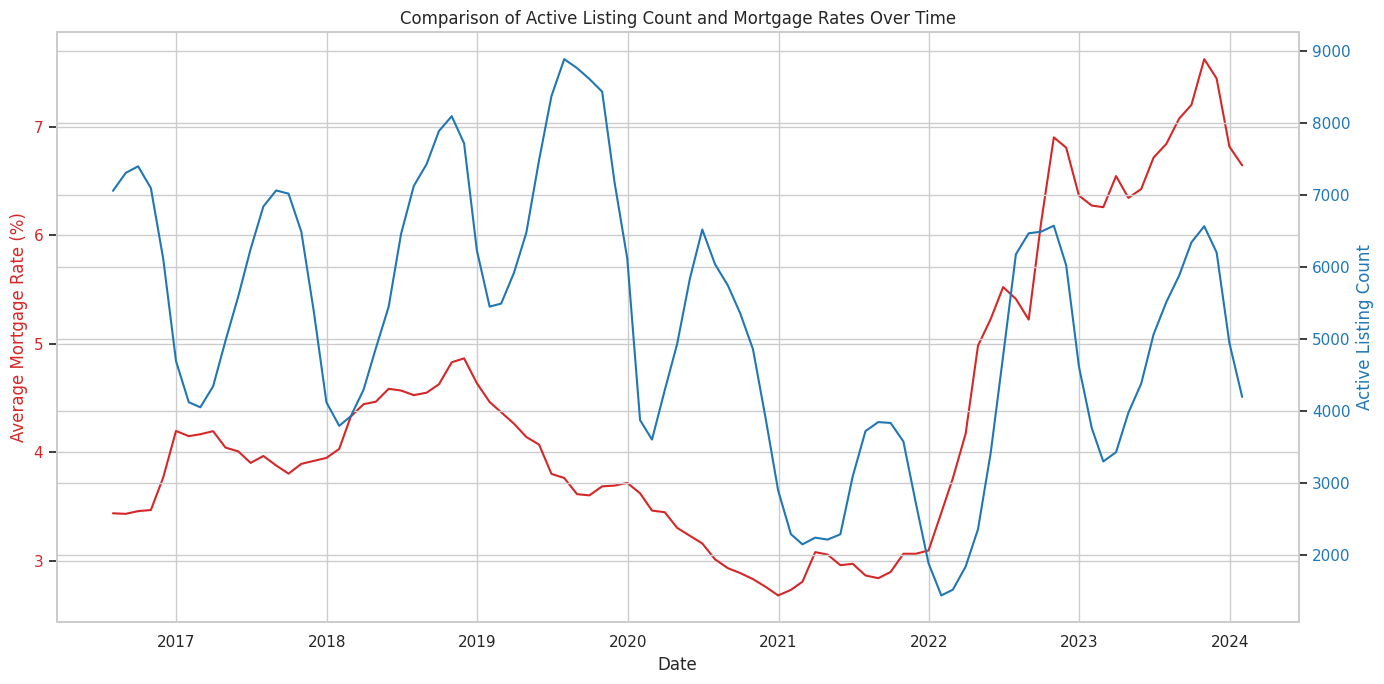

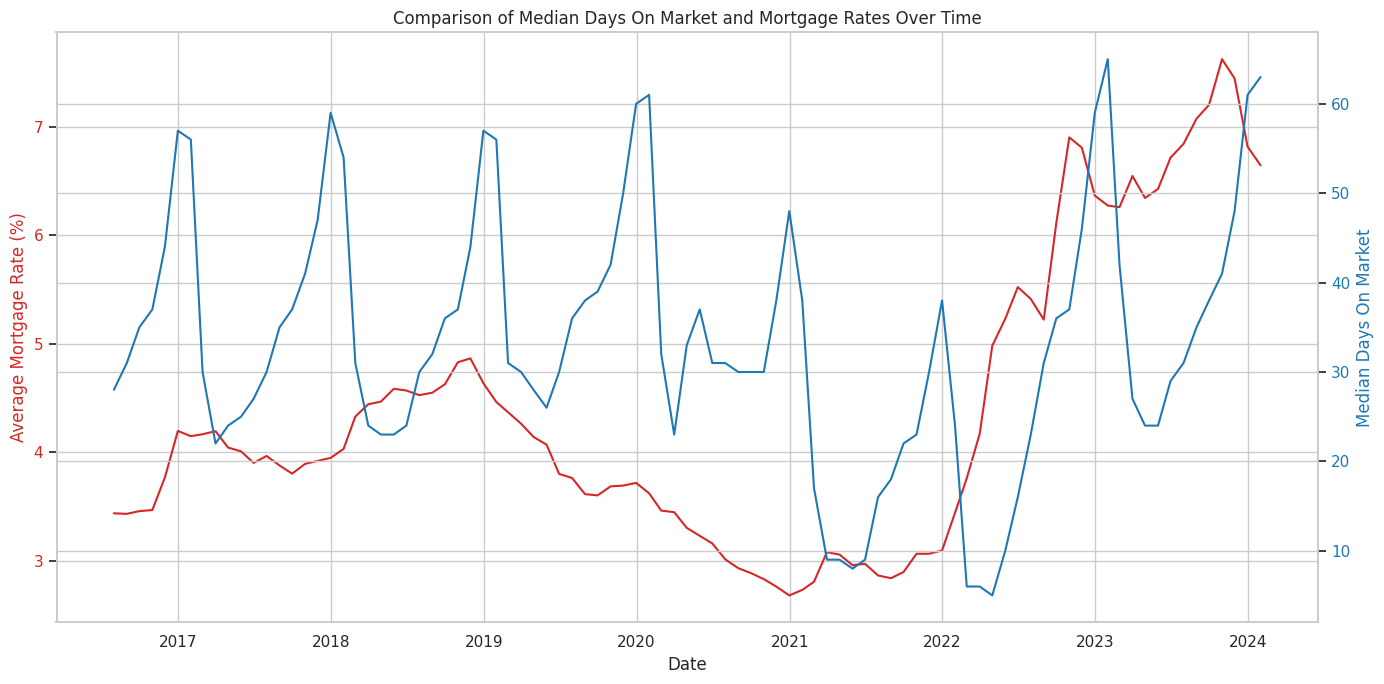

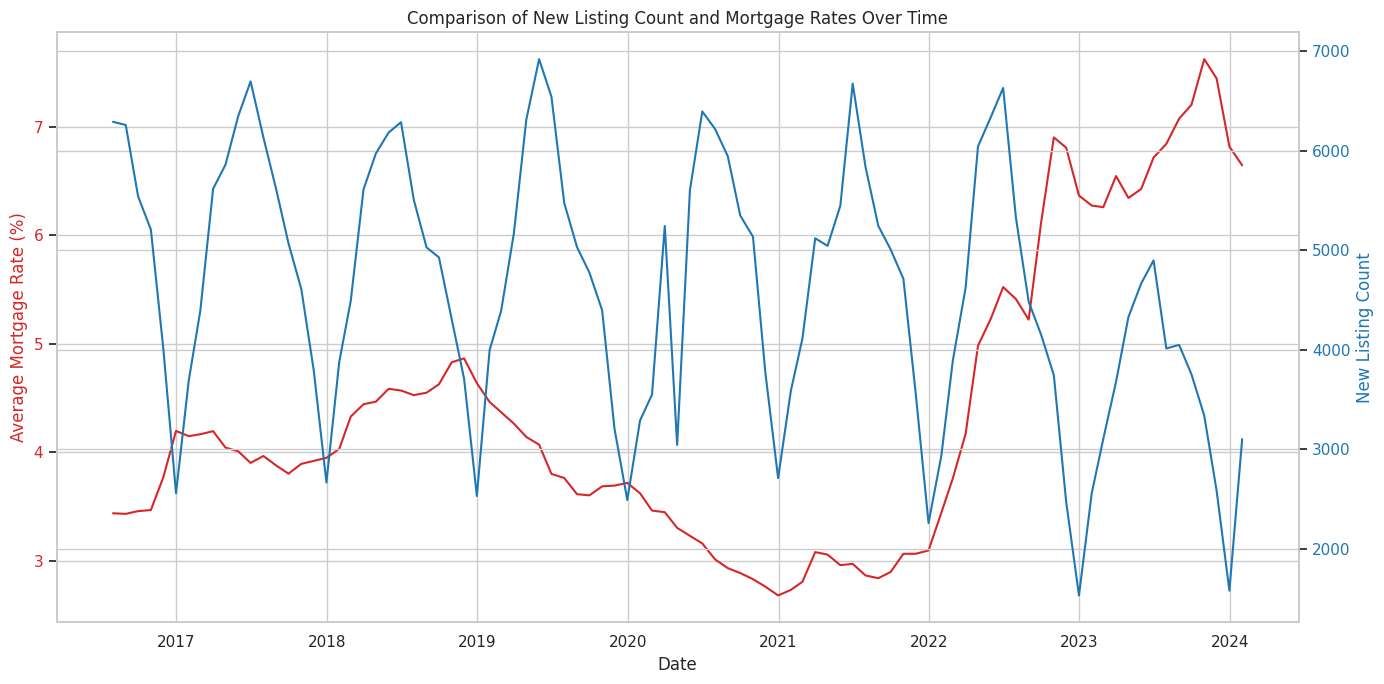

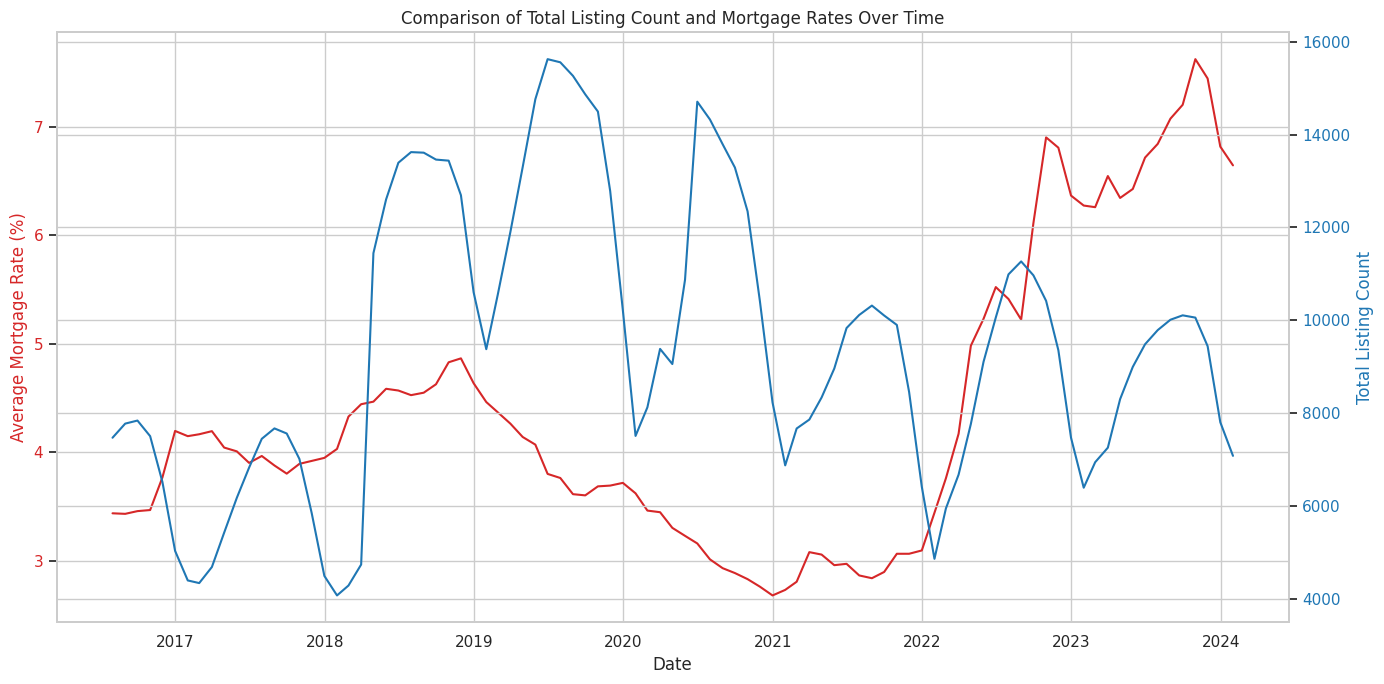

In [23]:
# Creating line charts with two lines: one for mortgage rates and one for each of the other variables to compare trends

# Indexing the data to `date`
merged_data.set_index('date', inplace=True)

# Creating line charts for the following variables (5):
variables = ['median_listing_price', 'active_listing_count', 'median_days_on_market',
             'new_listing_count', 'total_listing_count']

# Plotting mortgage rates and each variable in the same chart for comparison
for var in variables:
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Average Mortgage Rate (%)', color=color)
    ax1.plot(merged_data['average_mortgage_rate'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(var.replace("_", " ").title(), color=color)
    ax2.plot(merged_data[var], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and show plot
    plt.title(f'Comparison of {var.replace("_", " ").title()} and Mortgage Rates Over Time')
    fig.tight_layout()
    plt.show()


## Comparison Interpretations

**Comparison of Median Listing Price and Mortgage Rates Over Time**
* The chart suggests a relationship between median listing prices and mortgage rates over time. It appears that as mortgage rates decrease, the median listing prices tend to increase and vice versa. This inverse relationship might indicate that lower borrowing costs encourage buyers to enter the market, driving up demand and prices. Conversely, higher mortgage rates could discourage buyers, leading to a cooling effect on prices. However, there are periods where this trend does not hold, suggesting other factors are also at play influencing home prices.

**Comparison of Active Listing Count and Mortgage Rates Over Time**
* The active listing count and mortgage rates show less of a clear inverse relationship. There are periods where both move in the same direction, which could suggest that other market dynamics, such as economic factors or housing supply constraints, are influencing the number of active listings independent of mortgage rate fluctuations.

**Comparison of Median Days on Market and Mortgage Rates Over Time**
* This chart illustrates that median days on market tend to rise as mortgage rates increase, which could indicate a slowing market. Higher borrowing costs may lead to fewer buyers, which extends the time listings remain on the market. However, there are also periods where days on market decrease even when mortgage rates rise, implying that factors other than mortgage rates, such as housing demand and seasonal trends, are affecting how long homes stay listed before sale.

**Comparison of New Listing Count and Mortgage Rates Over Time**
* The new listing count does not show a consistent pattern in relation to mortgage rates. While there are instances where an increase in mortgage rates corresponds with a decrease in new listings, suggesting sellers might be hesitant to list during periods of high borrowing costs, there are also times when the two metrics appear uncorrelated. This inconsistency could be due to the fact that the decision to list a property is influenced by a variety of factors, including personal circumstances, market sentiment, seasonality, and long-term economic expectations.

**Comparison of Total Listing Count and Mortgage Rates Over Time**
* For total listing count, the relationship with mortgage rates is complex and non-linear. While one might expect higher mortgage rates to lead to fewer listings as market activity slows, the chart shows that the total number of listings can be affected by other variables such as seasonality, the overall state of the economy, and specific local market conditions.



**Conducting the Hypothesis Test**

In [24]:
# Conducting the hypothesis test - Pearson correlation between mortgage rates and median listing price
corr_coeff_price, p_value_price = pearsonr(merged_data['average_mortgage_rate'], merged_data['median_listing_price'])

# Conducting the hypothesis test - Pearson correlation between mortgage rates and active listing count
corr_coeff_listings, p_value_listings = pearsonr(merged_data['average_mortgage_rate'], merged_data['active_listing_count'])

# Displaying the results
print(f"Correlation Coefficient (Mortgage Rates vs Median Listing Price): {corr_coeff_price:.4f}")
print(f"P-value (Mortgage Rates vs Median Listing Price): {p_value_price:.4f}")

print(f"Correlation Coefficient (Mortgage Rates vs Active Listing Count): {corr_coeff_listings:.4f}")
print(f"P-value (Mortgage Rates vs Active Listing Count): {p_value_listings:.4f}")



Correlation Coefficient (Mortgage Rates vs Median Listing Price): 0.5339
P-value (Mortgage Rates vs Median Listing Price): 0.0000
Correlation Coefficient (Mortgage Rates vs Active Listing Count): 0.1489
P-value (Mortgage Rates vs Active Listing Count): 0.1588


**Interpreting the Results**

# The results of the Pearson correlation tests are as follows:

**Mortgage Rates vs Median Listing Price:**
* Correlation Coefficient: 0.5339
* P-value: < 0.0001
* The correlation coefficient of 0.5339 suggests a moderate positive relationship between mortgage rates and median listing prices in the Denver area. The p-value being less than 0.05 indicates this is statistically significant, and we can reject the null hypothesis for this relationship. This implies that as mortgage rates increase, the median listing prices also tend to increase.

**Mortgage Rates vs Active Listing Count:**
* Correlation Coefficient: 0.1489
* P-value: 0.1588
* The correlation coefficient of 0.1489 indicates a weak positive relationship between mortgage rates and active listing count. However, the p-value is greater than 0.05, which suggests that the relationship is not statistically significant. Based on this result, we fail to reject the null hypothesis for the relationship between mortgage rates and active listing count. This means that we don't have enough evidence to support a significant impact of mortgage rates on the number of active listings.

These results align with the initial analysis, with the correlation between mortgage rates and median listing price being significant and relatively stronger compared to the relationship with active listing count, which is not significant. This can inform stakeholders in the Denver real estate market that while mortgage rates seem to influence listing prices, their effect on the number of active listings is less clear and not supported by this specific analysis.





---


**Section 5: Regression Analysis**

# Regression Analysis

To further investigate the impact of mortgage rates on the Denver real estate market, a regression analysis will be performed. This analysis will quantify the relationship and allow for adjustments based on other factors that may influence market indicators such as median listing price and active listing count.

**Performing Regression Analysis**

In [25]:
# Selecting independent variables for regression analysis
# (Selecting mortgage rates and other factors that could affect the median listing price as variables)
independent_vars = ['average_mortgage_rate', 'active_listing_count', 'new_listing_count',
                    'price_reduced_count', 'pending_listing_count']
X = merged_data[independent_vars]
y = merged_data['median_listing_price']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
model_summary = model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     median_listing_price   R-squared:                       0.850
Model:                              OLS   Adj. R-squared:                  0.841
Method:                   Least Squares   F-statistic:                     96.10
Date:                  Sun, 25 Feb 2024   Prob (F-statistic):           1.80e-33
Time:                          06:07:54   Log-Likelihood:                -1053.6
No. Observations:                    91   AIC:                             2119.
Df Residuals:                        85   BIC:                             2134.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.439e+05   2.45e+04     22.220      0.000    4.95e+05    5.93e+05
average_mortgage_rate  2.933e+04   2698.591     10.867      0.000     2.4e+04    3.47e+04
active_listing_count    -46.9412      4.004    -11.725      0.000     -54.901     -38.981
new_listing_count         2.6862      2.598      1.034      0.304      -2.480       7.852
price_reduced_count      37.2430      5.787      6.436      0.000      25.737      48.749
pending_listing_count     5.7786      1.351      4.278      0.000       3.093       8.464
==============================================================================
Omnibus:                        8.475   Durbin-Watson:                   0.503
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.556
Skew:                          -0.183   Prob(JB):                        0.169
Kurtosis:                       2.103   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Section 6: Conclusion and Summary**

## OLS Regression Results Summary

The Ordinary Least Squares (OLS) regression analysis was performed to assess the influence of mortgage rates and other market variables on the median listing price in the Denver-Aurora-Lakewood, CO real estate market.

### Model Fit
- **R-squared**: 0.850, indicating that the model explains 85% of the variance in the median listing price.
- **Adjusted R-squared**: 0.841, which adjusts for the number of predictors in the model.
- **F-statistic**: 96.10, with a Prob (F-statistic) of 1.80e-33, indicating that the model is a good fit for the data.

### Coefficients and Interpretation
- **Average Mortgage Rate**: Positive coefficient (2.933e+04) with a statistically significant p-value, suggesting that an increase in mortgage rates is associated with an increase in median listing prices.
- **Active Listing Count**: Negative coefficient (-46.9412) with a significant p-value, implying that more active listings might drive the prices down.
- **New Listing Count**: Coefficient (2.6862) is not statistically significant (p-value = 0.304), indicating no clear impact on the median listing price.
- **Price Reduced Count**: Positive coefficient (37.2430) with a significant p-value, indicating that listings with reduced prices contribute to higher median listing prices.
- **Pending Listing Count**: Positive coefficient (5.7786) with a significant p-value, suggesting that an increase in pending listings is associated with higher median listing prices.

### Diagnostics
- A large condition number points to potential multicollinearity, which could affect the reliability of the coefficient estimates.

### Conclusion
The analysis confirms the significant influence of mortgage rates on the median listing prices in Denver's real estate market. It also suggests that an excess of active listings may lead to lower prices, while pending listings and price reductions correlate with higher listing prices.

### Limitations and Future Research Directions
- The model may benefit from addressing the multicollinearity to refine the individual effects of the predictors.
- The study is specific to the Denver metro area and may not apply to other nearby subarbs or metro regions such as Boulder, Westminster, Broomfield, etc.
- The data covers a specific period, which may not fully represent very recent or future market trends.
- Further research could segment the housing market to determine the impact of mortgage rates on different housing tiers and incorporate additional economic indicators to provide a more comprehensive analysis.






---


**Section 7: Detailed Variable Analysis**

# Detailed Variable Analysis

## Variable Descriptions
- `median_listing_price`: The median price at which homes are listed for sale in the market.
- `active_listing_count`: The number of active home listings at the end of the month.
- `median_days_on_market`: The median number of days listings are active on the market before sale.
- `new_listing_count`: The number of new listings added to the market within the month.
- `average_mortgage_rate`: The average rate for a 30-year fixed mortgage rate, which reflects the cost of borrowing.



## Histograms & Descriptive Statistics
This section presents the histograms and descriptive statistics for key real estate market indicators. The objective is to visually inspect the distribution of each variable and provide a summary of their central tendency, dispersion, and the presence of outliers. The variables under consideration include median listing price, active listing count, median days on market, new listing count, and average mortgage rate. Understanding the distribution of these variables is crucial for identifying patterns, outliers, and normality, which will inform subsequent analyses and help validate assumptions about the data.



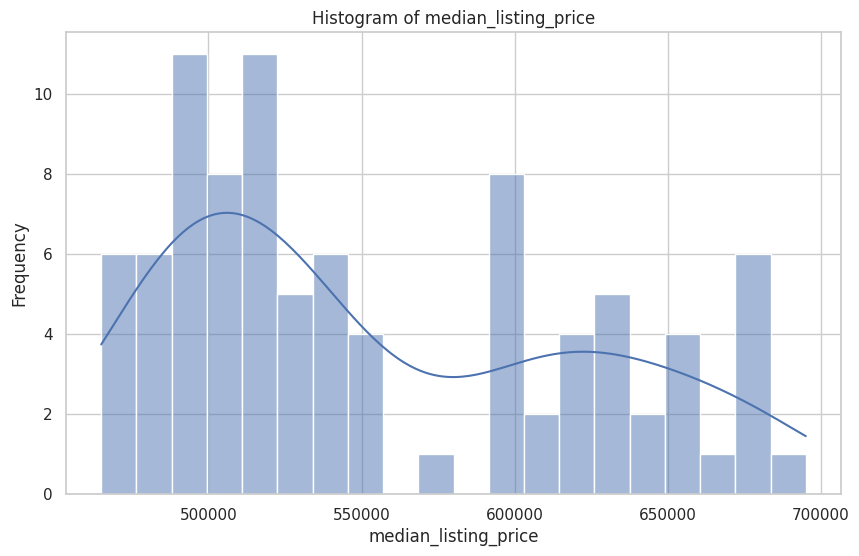

Descriptive Statistics for median_listing_price:
count       91.00
mean    555178.63
std      66975.00
min     465000.00
25%     499264.50
50%     530900.00
75%     612500.00
max     695000.00
Name: median_listing_price, dtype: float64
Mode: 600000
Outliers: 0 identified outside of [329411.25, 782353.25] range



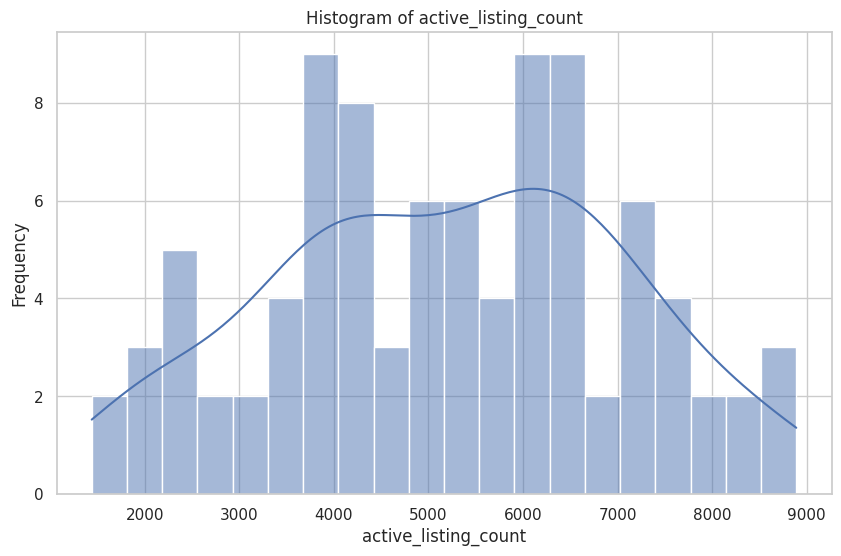

Descriptive Statistics for active_listing_count:
count     91.00
mean    5203.87
std     1847.06
min     1438.00
25%     3861.00
50%     5398.00
75%     6493.50
max     8891.00
Name: active_listing_count, dtype: float64
Mode: 1438
Outliers: 0 identified outside of [-87.75, 10442.25] range



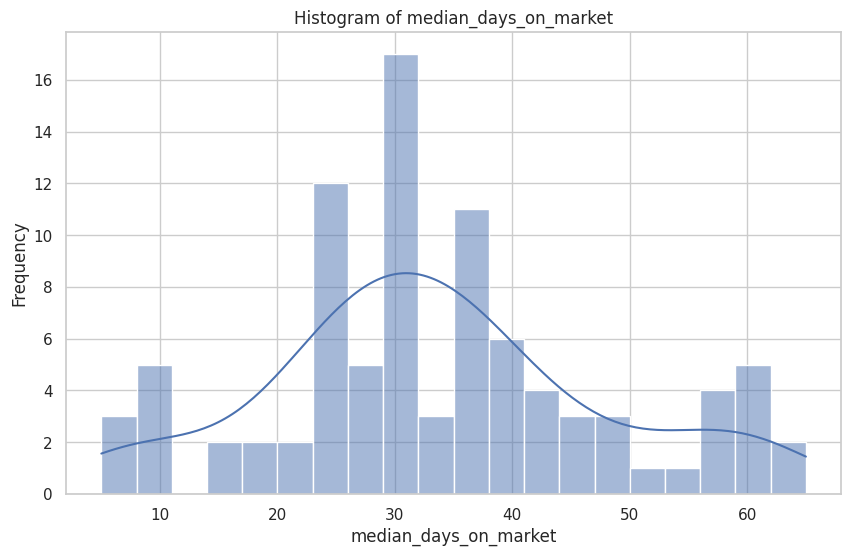

Descriptive Statistics for median_days_on_market:
count   91.00
mean    33.34
std     14.10
min      5.00
25%     24.00
50%     31.00
75%     40.00
max     65.00
Name: median_days_on_market, dtype: float64
Mode: 30.0
Outliers: 1 identified outside of [0.0, 64.0] range



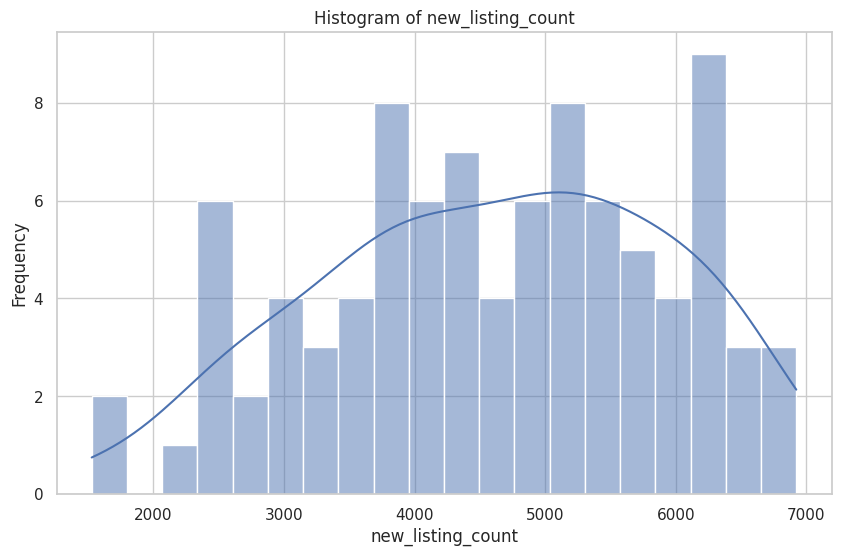

Descriptive Statistics for new_listing_count:
count     91.00
mean    4595.30
std     1310.26
min     1528.00
25%     3700.00
50%     4666.00
75%     5608.00
max     6922.00
Name: new_listing_count, dtype: float64
Mode: 2556
Outliers: 0 identified outside of [838.0, 8470.0] range



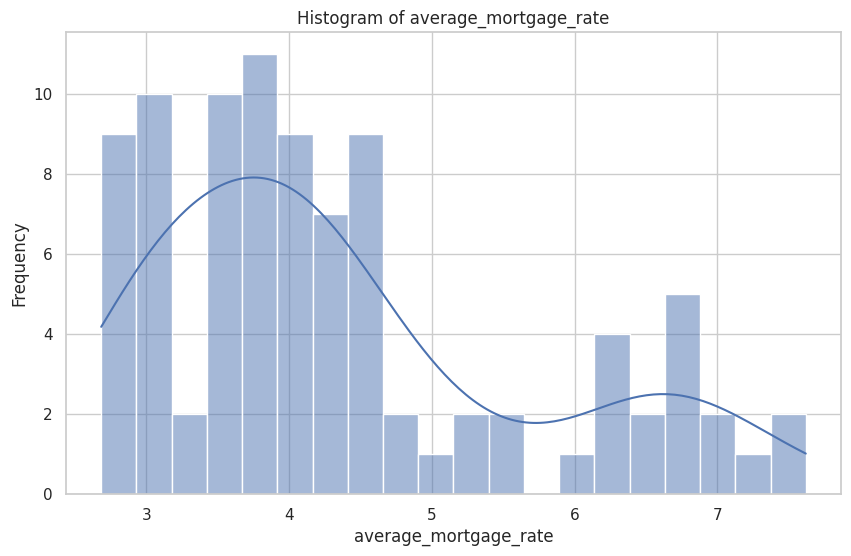

Descriptive Statistics for average_mortgage_rate:
count   91.00
mean     4.35
std      1.32
min      2.68
25%      3.44
50%      4.01
75%      4.85
max      7.62
Name: average_mortgage_rate, dtype: float64
Mode: 3.0675
Outliers: 4 identified outside of [1.33425, 6.95625] range



In [26]:
# Setting up the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Chosen vaariables for histograms and descriptive statistics
variables = ['median_listing_price', 'active_listing_count', 'median_days_on_market',
             'new_listing_count', 'average_mortgage_rate']

# Creating histograms and calculating descriptive statistics for each variable (5)
for var in variables:
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Calculating descriptive statistics
    descriptive_stats = merged_data[var].describe()
    mode_value = merged_data[var].mode()[0]  # Mode calculation
    IQR = descriptive_stats['75%'] - descriptive_stats['25%']  # IQR calculation
    lower_bound = descriptive_stats['25%'] - 1.5 * IQR  # Lower bound for outliers
    upper_bound = descriptive_stats['75%'] + 1.5 * IQR  # Upper bound for outliers
    outliers = merged_data[(merged_data[var] < lower_bound) | (merged_data[var] > upper_bound)]
    num_outliers = len(outliers)  # Counting outliers

    # Displaying descriptive statistics and outlier information
    print(f"Descriptive Statistics for {var}:")
    print(descriptive_stats)
    print(f"Mode: {mode_value}")
    print(f"Outliers: {num_outliers} identified outside of [{lower_bound}, {upper_bound}] range\n")


## Probability Mass Function (PMF) Comparison


In this section, the probability mass functions (PMFs) for the 'median_days_on_market' variable will be analyzed. Listings will be compared based on whether their price falls above or below the median listing price.  The PMF is a function that gives the probability that a discrete random variable is exactly equal to some value. By comparing the PMFs of these two subsets of data — properties with listing prices above and below the median — the goal is to uncover any differences in how long properties stay on the market based on their listing price.

This comparison can provide insights into market behavior. For instance, if higher-priced properties tend to stay on the market longer, the PMF for the above-median group would show higher probabilities for greater numbers of days on the market. Conversely, if higher-priced properties sell faster, the opposite trend would be observed. Analyzing PMFs allows for a deeper understanding of the distribution of days on the market for these two segments of the real estate market in the Denver-Aurora-Lakewood, CO area.


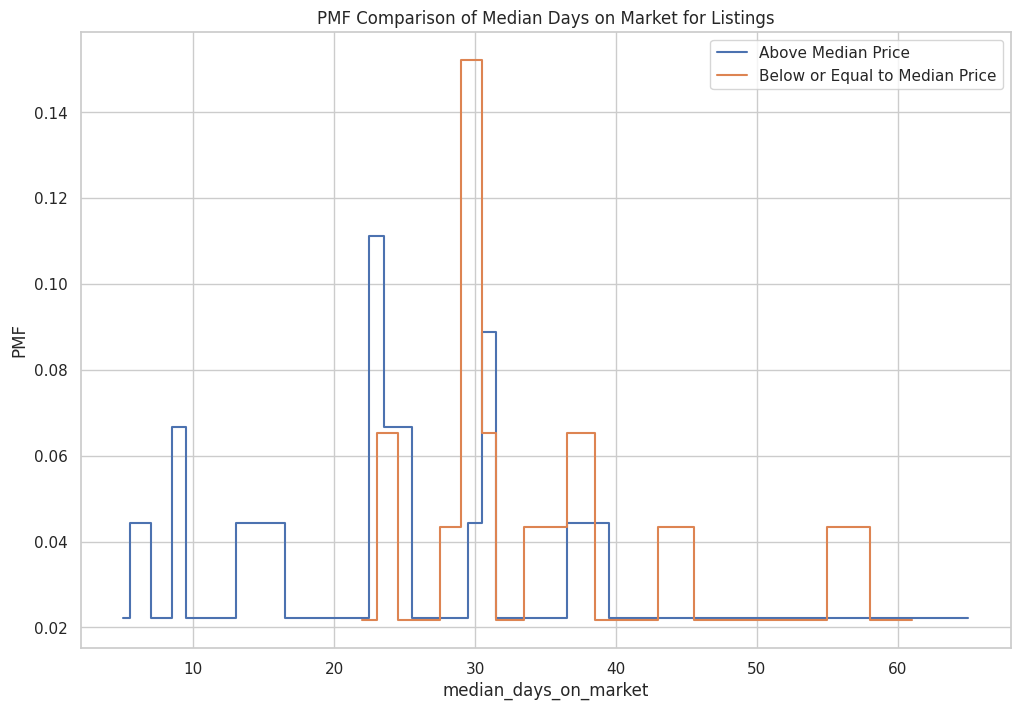

In [27]:
# Determining the median listing price for the dataset
median_price = merged_data['median_listing_price'].median()

# Splitting the dataset into two groups
above_median = merged_data[merged_data['median_listing_price'] > median_price]
below_median = merged_data[merged_data['median_listing_price'] <= median_price]

# Choosing 'median_days_on_market' for PMF comparison
variable = 'median_days_on_market'

# Calculating frequencies for each value in the variable for both groups
above_median_freq = above_median[variable].value_counts().sort_index() / len(above_median)
below_median_freq = below_median[variable].value_counts().sort_index() / len(below_median)

# Plotting the PMFs
plt.figure(figsize=(12, 8))
plt.step(above_median_freq.index, above_median_freq, where='mid', label='Above Median Price')
plt.step(below_median_freq.index, below_median_freq, where='mid', label='Below or Equal to Median Price')
plt.xlabel(variable)
plt.ylabel('PMF')
plt.title('PMF Comparison of Median Days on Market for Listings')
plt.legend()
plt.show()


**Interpretation of PMF Comparison**
* The PMF comparison of median days on market for listings above and below the median listing price offers valuable insights into the dynamics of the Denver-Aurora-Lakewood, CO real estate market. Here's how to interpret the findings:
* Distribution Shape: The shape of the PMFs can reveal  differences in how quickly properties sell relative to their listing price. A PMF skewed towards higher median days on the market suggests that those properties generally take longer to sell.
* Peaks in the PMF: Peaks in the PMF indicate common durations for listings to stay on the market before being sold. Comparing peaks between the two groups can reveal differences in typical market behavior based on listing price.
* Comparison of Probabilities: Examining the probabilities (heights of the PMF) for specific days on the market helps determine whether properties above the median price are more or less likely to be sold within a certain timeframe compared to those at or below the median price.

**Key Insights:**
* Listings Above Median Price: The PMF for properties above the median shows peaks around 20 and 40 days on the market. This suggests two common selling durations. The first peak might indicate high-demand areas or competitively priced listings, while the second peak suggests a segment where properties take longer to find the right buyer.
* Listings Below or Equal to Median Price:  The PMF for properties at or below the median is higher for fewer days on the market, peaking around 30 days.  These properties tend to sell faster, likely due to factors like higher demand in the price range or a larger buyer pool.

**Comparative Insights:**
* Properties below or equal to the median price consistently show a higher probability of shorter days on the market, indicating faster turnover. This could reflect stronger demand for more affordable homes.
* Listings above the median price have a wider spread of days on the market, with probabilities extending to longer durations. This might be due to varying buyer interest, negotiation processes, or unique property features appealing to a specific buyer group.

**Market Implications:**
* Sellers of higher-priced properties should anticipate potentially longer selling periods and consider strategies to enhance appeal or adjust pricing.
* Buyers in the lower-priced segment might face more competition and need to act quickly, as these homes tend to sell faster.

This PMF comparison highlights the complexity of the real estate market and the importance of pricing strategy.  It shows how demand and selling times can vary based on price points, offering valuable insights for Denver-area buyers and sellers.

## Cumulative Distribution Function (CDF) Analysis

The Cumulative Distribution Function (CDF) is a powerful tool in statistical analysis that provides a complete picture of the probability distribution of a variable. This section focuses on constructing and analyzing the CDF for the 'median_days_on_market' variable.

The CDF will calculate the probability that a listing will be on the market for a certain number of days or fewer. By evaluating the CDF, it's possible to determine the likelihood that listings are sold within a particular timeframe and identify the proportion of listings that stay on the market for extended periods. This analysis is crucial for understanding the liquidity of the housing market in the Denver-Aurora-Lakewood, CO area and for identifying how quickly homes are moving through the market at various threshold levels.



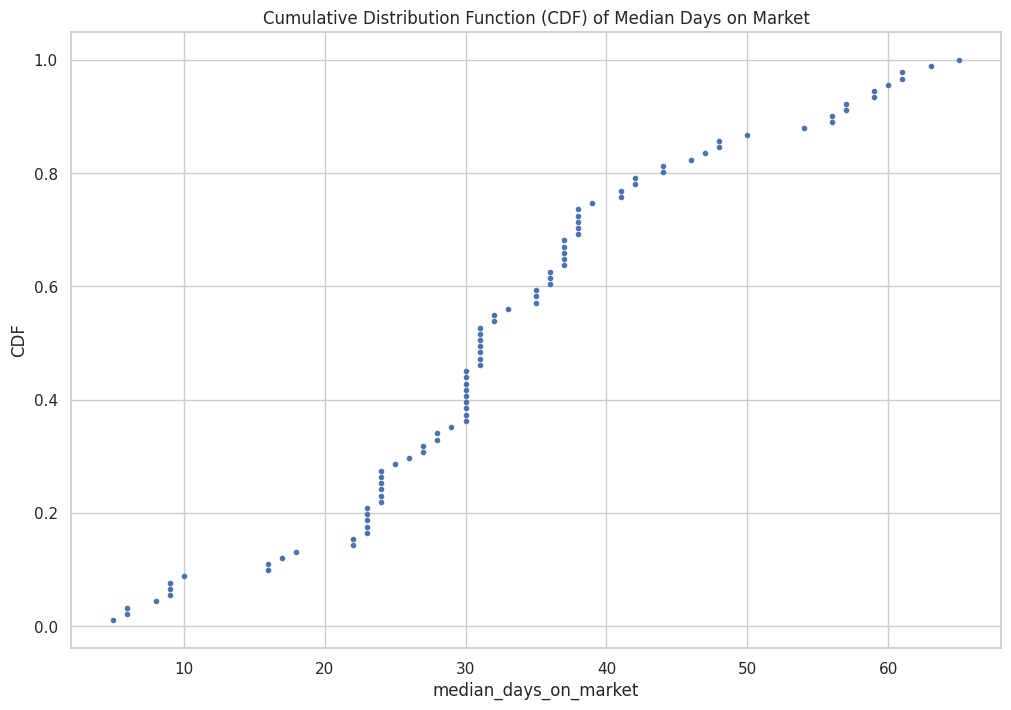

In [28]:
# Selecting 'median_days_on_market'
variable_cdf = 'median_days_on_market'

# Calculating the CDF
# Sorting the data
sorted_data = np.sort(merged_data[variable_cdf])

# Calculating the CDF values
cdf_values = np.arange(1, len(sorted_data)+1) / len(sorted_data)

# Plotting the CDF
plt.figure(figsize=(12, 8))
plt.plot(sorted_data, cdf_values, marker='.', linestyle='none')
plt.xlabel(variable_cdf)
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Median Days on Market')
plt.grid(True)
plt.show()



## Interpretation of the CDF of Median Days on Market
The CDF provides a clear visual representation of the proportion of listings that remain on the market for a certain number of days or less. Here's what can be deduced from the plot:
* Rapid Sales: A steep rise in the CDF at the lower end of the days on market indicates that a significant proportion of properties are sold relatively quickly. For example, a sharp increase in the CDF at 20 days would imply that a large fraction of homes are sold within 20 days of listing.
* Typical Selling Time: The median days on market can be found at the 0.5 (or 50%) mark on the CDF. This is the point where half of the properties have been sold and half remain on the market, providing a clear benchmark for typical selling time in the area.
* Long-Term Listings: The upper tail of the CDF (towards the right-hand side) shows the proportion of listings that take a longer time to sell. A more gradual approach of the CDF towards 1.0 indicates that a portion of properties takes significantly longer to sell.

**Key Insights:**

* Approximately 50% of properties are sold within approximately 30 days or less, indicating a relatively quick turnover for a substantial portion of the market.
* Nearly all properties are sold by around 60 days, with very few properties taking longer to sell.

**Implications:**
* For sellers: The CDF can guide pricing and marketing strategies. Properties lingering on the market longer than the median days may need additional promotion or price adjustments.
* For buyers: The CDF indicates the pace of the market. In a fast-moving market (where the CDF rises quickly), buyers may need to make decisions more rapidly.
The CDF is a valuable tool for stakeholders to understand market dynamics and to set expectations regarding the time properties are likely to remain on the market in the Denver-Aurora-Lakewood, CO metro area.



## Analytical Distribution Analysis

The analytical distribution provides a theoretical model that can be compared against actual data. For this real estate dataset, the 'median_days_on_market' variable will be analyzed to assess how well it conforms to a normal distribution. This comparison is fundamental in statistics as many statistical tests assume normality in the data distribution.

Using the mean and standard deviation of the data, a normal distribution will be modeled. This will serve as a benchmark to assess the distribution of the actual data. If the data closely aligns with the normal distribution, it may suggest that the underlying process generating the market behavior has similar characteristics.  Deviations from the normal distribution could indicate potential skewness, outliers, or other irregularities that warrant further analysis.

By plotting the actual data against the theoretical model, the fit can be visually assessed, highlighting significant differences. These differences might suggest avenues for deeper investigation into the factors affecting the time properties spend on the market.



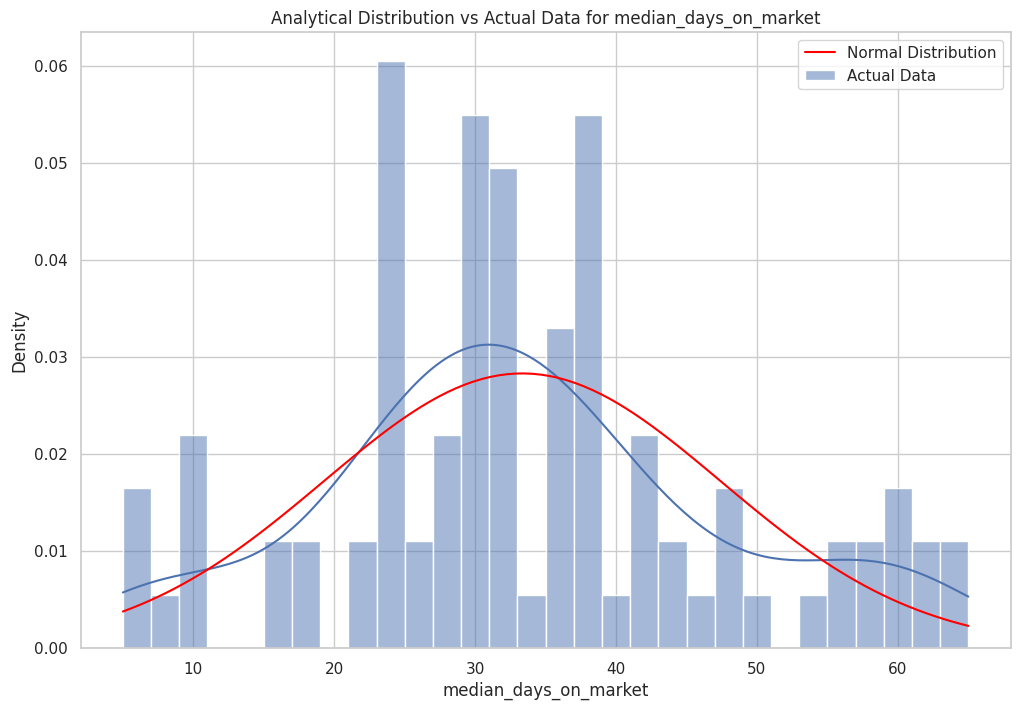

In [29]:
# Selecting 'median_days_on_market' as the variable for the analytical distribution
variable_dist = 'median_days_on_market'

# Calculating the mean and standard deviation
mean_val = merged_data[variable_dist].mean()
std_val = merged_data[variable_dist].std()

# Generating a range of values between the min and max values
range_vals = np.linspace(merged_data[variable_dist].min(), merged_data[variable_dist].max(), 100)

# Calculating the PDF of the normal distribution with the calculated mean and standard deviation
pdf_vals = norm.pdf(range_vals, mean_val, std_val)

# Plotting the analytical distribution (Normal Distribution) vs the actual data histogram
plt.figure(figsize=(12, 8))
sns.histplot(merged_data[variable_dist], kde=True, stat='density', bins=30, label='Actual Data')
plt.plot(range_vals, pdf_vals, label='Normal Distribution', color='red')
plt.title(f'Analytical Distribution vs Actual Data for {variable_dist}')
plt.xlabel(variable_dist)
plt.ylabel('Density')
plt.legend()
plt.show()



## Interpretation of the Analytical Distribution Results
The histogram overlaid with the normal distribution curve allows us to examine the distribution of 'median_days_on_market' in relation to what would be expected if the data were perfectly normally distributed.
* Overall Fit to Normal Distribution: The red curve represents the normal distribution based on the calculated mean and standard deviation of the 'median_days_on_market'. While the bars (representing the actual distribution) generally align with the curve, there are notable deviations.
* Central Tendency: The bulk of the data clusters around the 30-day mark, consistent with the mean. This is typical of normal distributions.
* Skewness and Tails: The histogram shows slight right-skewness, with a longer tail towards higher 'median_days_on_market'. This indicates more listings take longer to sell than would be expected in a perfect normal distribution.
* Peaks and Valleys: Multiple peaks in the actual distribution suggest common, specific durations for listings on the market. These peaks are not captured by the normal distribution model and might correspond to typical transaction cycles or market behaviors.

**Key Insights:**

* While the normal distribution provides a baseline, the actual distribution highlights nuances in the Denver real estate market that a simple normal model might not fully capture.
* The longer right tail suggests that while many listings sell near the mean selling time, some take substantially longer. This could indicate a market segment with different dynamics.

**Implications for Stakeholders:**
* Real estate agents and sellers can use this information to manage expectations about selling times. It's important to plan for the possibility of a longer selling process, even if many listings sell around the average time.
* Buyers might see the longer tail as suggesting opportunities to find listings that have been on the market longer, potentially leading to negotiation possibilities.

This detailed examination of 'median_days_on_market' through an analytical distribution offers a richer understanding of market behavior, which can inform strategies for selling and buying homes in the Denver metro area.


## Scatter Plots and Correlation Analysis

In this section, the relationships between key real estate metrics will be explored by creating scatter plots and examining correlation coefficients.  The focus will be on how the median listing price interacts with both the median days on market and the average mortgage rate. Scatter plots are a fundamental exploratory tool revealing the nature of the relationship between two variables (linear, non-linear, or non-existent).

First, the relationship between the median listing price and the median days on market will be examined to see if there's a correlation between higher-priced homes and the time they spend listed before sale.  Next, the relationship between the median listing price and the average mortgage rate will be explored to understand how changes in borrowing costs might be associated with the pricing of homes in the market.

The Pearson correlation coefficient will be calculated for each pair of variables to quantify the strength and direction of these relationships. This analysis is critical for real estate stakeholders seeking to understand market dynamics and make informed decisions based on how these factors interact.



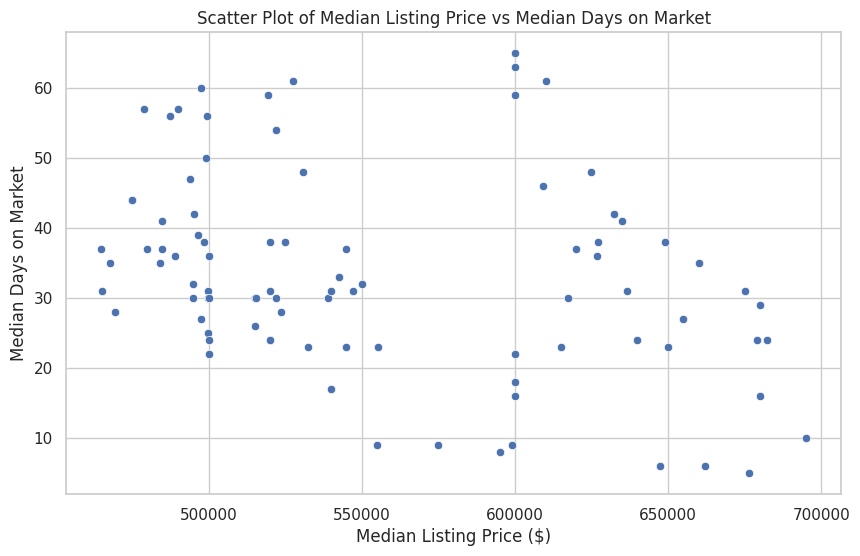

Pearson Correlation Coefficient (Median Listing Price vs Median Days on Market): -0.3193


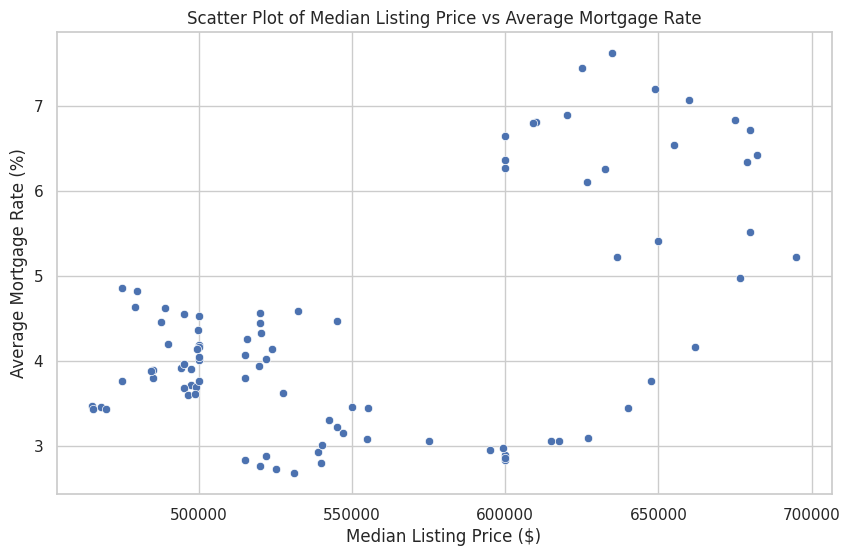

Pearson Correlation Coefficient (Median Listing Price vs Average Mortgage Rate): 0.5339


In [30]:
# Creating two scatter plots:
# 1. 'median_listing_price' vs 'median_days_on_market' and
# 2. 'median_listing_price' vs 'average_mortgage_rate'.

# Pair 1: 'median_listing_price' vs 'median_days_on_market'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_listing_price', y='median_days_on_market', data=merged_data)
plt.title('Scatter Plot of Median Listing Price vs Median Days on Market')
plt.xlabel('Median Listing Price ($)')
plt.ylabel('Median Days on Market')
plt.show()

# Calculating Pearson correlation for Pair 1
corr_coefficient_pair1 = merged_data['median_listing_price'].corr(merged_data['median_days_on_market'])
print(f"Pearson Correlation Coefficient (Median Listing Price vs Median Days on Market): {corr_coefficient_pair1:.4f}")

# Pair 2: 'median_listing_price' vs 'average_mortgage_rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_listing_price', y='average_mortgage_rate', data=merged_data)
plt.title('Scatter Plot of Median Listing Price vs Average Mortgage Rate')
plt.xlabel('Median Listing Price ($)')
plt.ylabel('Average Mortgage Rate (%)')
plt.show()

# Calculating Pearson correlation for Pair 2
corr_coefficient_pair2 = merged_data['median_listing_price'].corr(merged_data['average_mortgage_rate'])
print(f"Pearson Correlation Coefficient (Median Listing Price vs Average Mortgage Rate): {corr_coefficient_pair2:.4f}")


## Scatter Plot Interpretations

**Scatter Plot of Median Listing Price vs Median Days on Market**
* Correlation Coefficient: -0.3193
* Interpretation: There appears to be a moderate negative correlation between the median listing price and the median days on the market. This suggests a trend where higher-priced properties may sell slightly faster. However, it's important to note that correlation doesn't equal causation. Many factors could contribute to this pattern including differences in buyer behavior at different price points or unique dynamics in the high-end market segment.

**Scatter Plot of Median Listing Price vs Average Mortgage Rate**
* Correlation Coefficient: 0.5339
* Interpretation: A moderate positive correlation exists between the median listing price and the average mortgage rate. This suggests that when mortgage rates are higher, listing prices also tend to be higher. This observation aligns with potential market trends where rising mortgage rates coincide with increasing property prices, possibly due to conditions like low supply and high demand.

**Considerations on Correlation and Causation**
* Correlation isn't causation: Finding a correlation does not mean one variable directly causes changes in the other. Other factors (economic policies, regional development, consumer behavior) could influence both mortgage rates and real estate prices.
* The market is complex: Multiple factors beyond mortgage rates influence listing prices and selling times. Location, property condition, local trends, and broader economic conditions all play a role.

The value of scatter plots: Scatter plots are a starting point for identifying potential relationships. To understand the true drivers of market behavior, further analysis is needed, potentially including multivariate regression models, time series analysis, and studies focused on establishing causality.



---


**Section 8: Project Summary**
# Project Summary

* The overarching question of this statistical analysis was to ascertain the relationship between mortgage rates and the Denver-Aurora-Lakewood, CO real estate market, particularly how changes in mortgage rates affect key market indicators such as median listing prices and active listing counts.

## Outcome of the EDA
* The exploratory data analysis (EDA) revealed a moderate positive correlation between mortgage rates and median listing prices, suggesting that as mortgage rates increase, so do listing prices. The active listing count showed a negative correlation with listing prices, indicating that as more homes enter the market, the median listing price tends to decrease. Histograms and PMF comparisons gave additional insights into market behavior, particularly in terms of how quickly properties are sold relative to their listing prices.

## Analysis Gaps
* The analysis may have benefited from additional economic variables, such as local employment rates, average income levels, or housing affordability indices. These factors could provide a more comprehensive picture of the forces driving the real estate market and could potentially explain variances not accounted for by mortgage rates alone.

## Additional Helpful Variables
* Inclusion of variables capturing buyer demographics, credit availability, or the impact of local zoning laws could have enriched the analysis. These variables might explain some of the observed trends in greater detail and provide a more nuanced understanding of the market dynamics.

## Assumptions Review
* One assumption was that monthly mortgage rates are representative of the entire month's market conditions. However, mortgage rates can fluctuate within the month, and this variation might have an impact on the market that the analysis did not capture. Moreover, the assumption that historical trends can forecast future movements does not account for unforeseen market shifts or policy changes.

## Challenges and Understanding
* A key challenge was the multicollinearity within the regression model, as it could obscure the interpretation of individual predictors. Distinguishing correlation from causation also presented a conceptual challenge, emphasizing the need for a deeper investigation into the causal relationships between variables.

In conclusion, the project highlighted the significance of mortgage rates as an economic indicator and their association with real estate market conditions. While the findings offer valuable insights, they also underscore the complexity of the market and the importance of considering a multitude of influencing factors. Future analyses could extend this work by incorporating a broader range of variables, employing different statistical models, and examining causality more closely.
